In [1]:
#importing of necessary libraries

import pandas as pd  
import numpy as np  
import seaborn as sns 
import pyreadstat 
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from imblearn.over_sampling import SMOTE

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from itertools import cycle
import time as time

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/modeling_data.csv", index_col= False)

In [3]:
df

,Age,Parity of index pregnanacy,Complications in previous pregnancy,Refered,Pretreatment pulse,Conscious,Estimate bloodloss,Cause pph,Was labor augmented,Complications index preg,...,Kebele_zeyse,Kebele_ziban gedena kebele,Kebele_zigem,Kebele_zigiti,Kebele_ziguara,Kebele_zihibest,Kebele_zilan amistya,Kebele_zone 3,Kebele_zone 4,Unnamed: 29_XY from 2016 EmONC Assessment
0,25.0,3.0,0.0,0.0,84.0,1.0,9999.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,20.0,1.0,0.0,0.0,100.0,1.0,9999.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,25.0,1.0,88.0,0.0,75.0,1.0,9999.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,26.0,4.0,88.0,0.0,90.0,1.0,9999.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,27.0,3.0,88.0,0.0,84.0,1.0,9999.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,30.0,1.0,0.0,0.0,80.0,1.0,9999.0,3.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7604,24.0,1.0,0.0,0.0,76.0,1.0,9999.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7605,28.0,3.0,0.0,1.0,85.0,1.0,9999.0,3.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7606,40.0,2.0,0.0,1.0,108.0,1.0,9999.0,2.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Columns: 14346 entries, Age to Unnamed: 29_XY from 2016 EmONC Assessment
dtypes: float64(14346)
memory usage: 832.7 MB


In [5]:
df.isnull().sum()

Age                                          0
Parity of index pregnanacy                   0
Complications in previous pregnancy          0
Refered                                      0
Pretreatment pulse                           0
                                            ..
Kebele_zihibest                              0
Kebele_zilan amistya                         0
Kebele_zone 3                                0
Kebele_zone 4                                0
Unnamed: 29_XY from 2016 EmONC Assessment    0
Length: 14346, dtype: int64

In [6]:
# Impute missing values with the mean of each column
df = df.fillna(df.mean())

In [7]:
# Define your feature columns (example given, excluding the target column 'Cause pph')
feature_columns = ['Age', 'Parity of index pregnanacy','Complications in previous pregnancy', 'Refered', 
                   'Pretreatment pulse','Conscious', 'Estimate bloodloss', 'Cause pph', 'Was labor augmented',
                     'Complications index preg', 'Mode of delivery', 'Episiotomy','Fluid given', 'Cross matching',
                       'Fluid intake', 'Uterotonic','Type of Uterotonic', 'Bimanual', 'Manual removal', 'Uterine ballon',
                       'Non Pneumatic', 'Uterine curettage', 'Laparotomy', 'Blood transfusion','Newborn outcome',
                       'Region/Province']

In [8]:
df = df[feature_columns]
df

,Age,Parity of index pregnanacy,Complications in previous pregnancy,Refered,Pretreatment pulse,Conscious,Estimate bloodloss,Cause pph,Was labor augmented,Complications index preg,...,Type of Uterotonic,Bimanual,Manual removal,Uterine ballon,Non Pneumatic,Uterine curettage,Laparotomy,Blood transfusion,Newborn outcome,Region/Province
0,25.0,3.0,0.0,0.0,84.0,1.0,9999.0,3.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,700.0,1.0,7.0
1,20.0,1.0,0.0,0.0,100.0,1.0,9999.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2,25.0,1.0,88.0,0.0,75.0,1.0,9999.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
3,26.0,4.0,88.0,0.0,90.0,1.0,9999.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
4,27.0,3.0,88.0,0.0,84.0,1.0,9999.0,1.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7603,30.0,1.0,0.0,0.0,80.0,1.0,9999.0,3.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,4.0
7604,24.0,1.0,0.0,0.0,76.0,1.0,9999.0,2.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0
7605,28.0,3.0,0.0,1.0,85.0,1.0,9999.0,3.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,700.0,1.0,14.0
7606,40.0,2.0,0.0,1.0,108.0,1.0,9999.0,2.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,4.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7608 entries, 0 to 7607
Data columns (total 26 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Age                                  7608 non-null   float64
 1   Parity of index pregnanacy           7608 non-null   float64
 2   Complications in previous pregnancy  7608 non-null   float64
 3   Refered                              7608 non-null   float64
 4   Pretreatment pulse                   7608 non-null   float64
 5   Conscious                            7608 non-null   float64
 6   Estimate bloodloss                   7608 non-null   float64
 7   Cause pph                            7608 non-null   float64
 8   Was labor augmented                  7608 non-null   float64
 9   Complications index preg             7608 non-null   float64
 10  Mode of delivery                     7608 non-null   float64
 11  Episiotomy                    

In [10]:
df.isnull().sum()

Age                                    0
Parity of index pregnanacy             0
Complications in previous pregnancy    0
Refered                                0
Pretreatment pulse                     0
Conscious                              0
Estimate bloodloss                     0
Cause pph                              0
Was labor augmented                    0
Complications index preg               0
Mode of delivery                       0
Episiotomy                             0
Fluid given                            0
Cross matching                         0
Fluid intake                           0
Uterotonic                             0
Type of Uterotonic                     0
Bimanual                               0
Manual removal                         0
Uterine ballon                         0
Non Pneumatic                          0
Uterine curettage                      0
Laparotomy                             0
Blood transfusion                      0
Newborn outcome 

In [11]:
# Separate features and target variable
target_column = 'Cause pph'
X = df.drop(target_column, axis=1)  # Features
y = df[target_column]               # Target variable

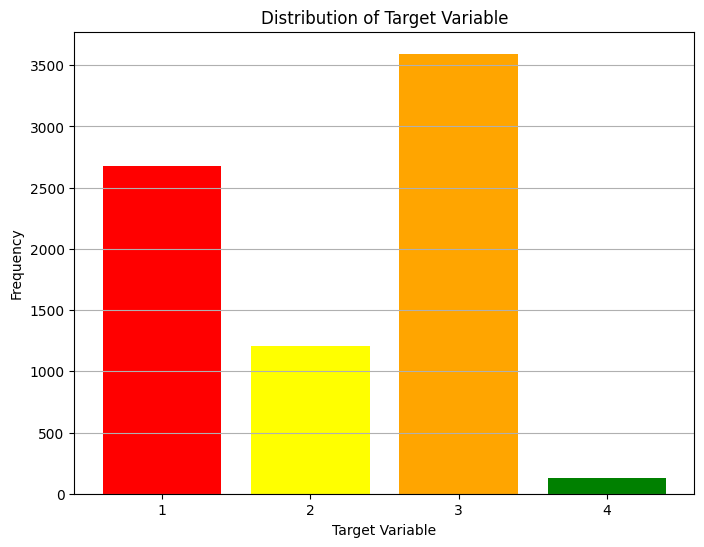

In [12]:
# visualize the target variable
# Define colors for each class
colors = ['red', 'yellow', 'orange', 'green']

# Count frequencies of each class
unique_classes, class_counts = np.unique(y, return_counts=True)

# Plot the bar graph with different colors
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color=colors)

plt.xlabel('Target Variable')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable')
plt.grid(axis='y')
plt.xticks(unique_classes)
plt.show()

In [13]:
# Apply SMOTE to balance the dataset class variables 
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

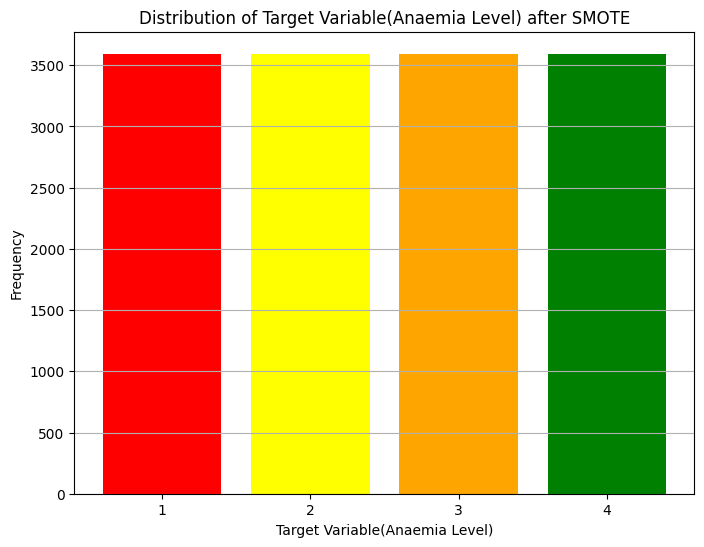

In [14]:
# Define colors for each class
colors = ['red', 'yellow', 'orange', 'green']

# Count frequencies of each class
unique_classes, class_counts = np.unique(y_resampled, return_counts=True)

# Plot the bar graph with different colors
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color=colors)

plt.xlabel('Target Variable(Anaemia Level)')
plt.ylabel('Frequency')
plt.title('Distribution of Target Variable(Anaemia Level) after SMOTE')
plt.grid(axis='y')
plt.xticks(unique_classes)
plt.show()

In [15]:
# Split the dataset into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [16]:
df.columns 

Index(['Age', 'Parity of index pregnanacy',
       'Complications in previous pregnancy', 'Refered', 'Pretreatment pulse',
       'Conscious', 'Estimate bloodloss', 'Cause pph', 'Was labor augmented',
       'Complications index preg', 'Mode of delivery', 'Episiotomy',
       'Fluid given', 'Cross matching', 'Fluid intake', 'Uterotonic',
       'Type of Uterotonic', 'Bimanual', 'Manual removal', 'Uterine ballon',
       'Non Pneumatic', 'Uterine curettage', 'Laparotomy', 'Blood transfusion',
       'Newborn outcome', 'Region/Province'],
      dtype='object')

In [17]:
df.isnull().sum()

Age                                    0
Parity of index pregnanacy             0
Complications in previous pregnancy    0
Refered                                0
Pretreatment pulse                     0
Conscious                              0
Estimate bloodloss                     0
Cause pph                              0
Was labor augmented                    0
Complications index preg               0
Mode of delivery                       0
Episiotomy                             0
Fluid given                            0
Cross matching                         0
Fluid intake                           0
Uterotonic                             0
Type of Uterotonic                     0
Bimanual                               0
Manual removal                         0
Uterine ballon                         0
Non Pneumatic                          0
Uterine curettage                      0
Laparotomy                             0
Blood transfusion                      0
Newborn outcome 

In [18]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Although currently no missing values, you can impute any future missing values with column mean
df = df.fillna(df.mean())


# Calculate mutual information scores
mi = mutual_info_classif(X_train, y_train)

# Convert mutual information scores to a Pandas Series
mi_series = pd.Series(mi, index= X_train.columns)

# Display the mutual information scores sorted in descending order
mi_sorted = mi_series.sort_values(ascending=False)
mi_sorted

Age                                    0.264132
Pretreatment pulse                     0.222750
Parity of index pregnanacy             0.198245
Region/Province                        0.185576
Uterotonic                             0.152349
Fluid given                            0.103653
Type of Uterotonic                     0.099883
Fluid intake                           0.064880
Cross matching                         0.064416
Bimanual                               0.061710
Refered                                0.059605
Complications index preg               0.058981
Manual removal                         0.055412
Episiotomy                             0.051615
Was labor augmented                    0.047196
Conscious                              0.045031
Mode of delivery                       0.044114
Blood transfusion                      0.037233
Newborn outcome                        0.028790
Complications in previous pregnancy    0.025889
Uterine curettage                      0

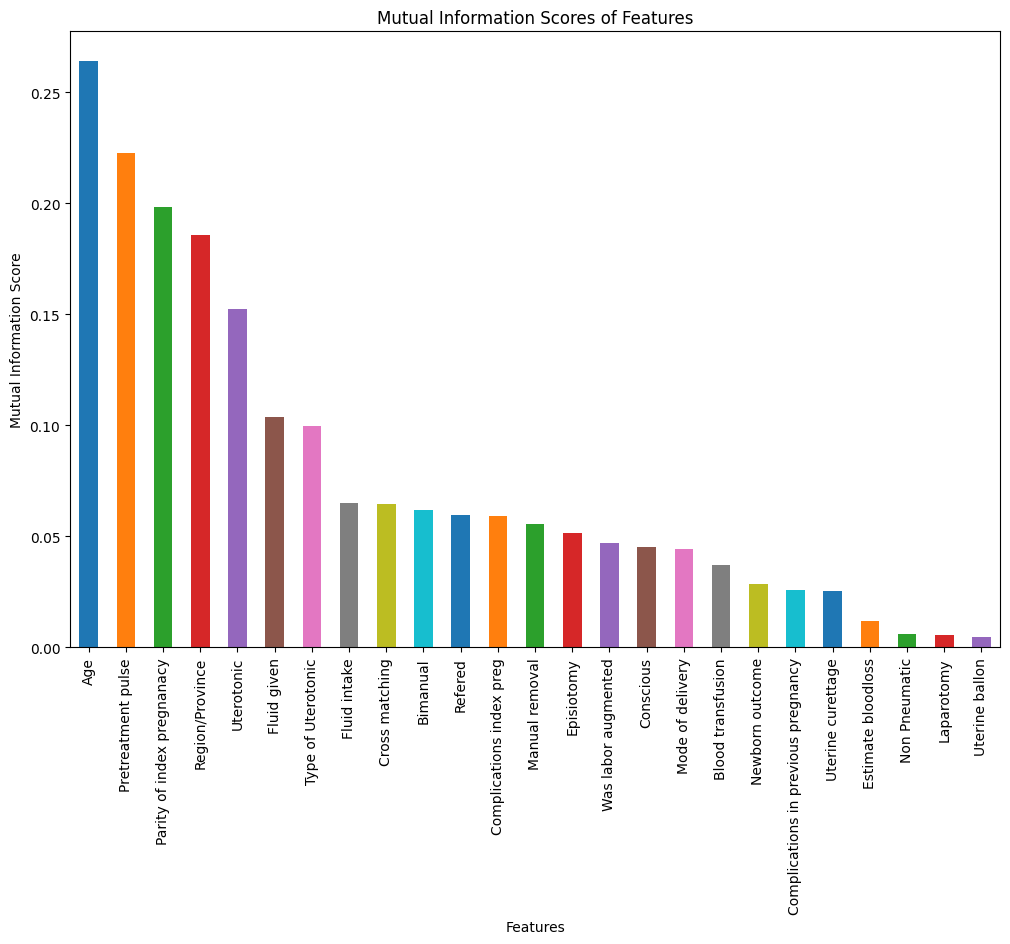

In [19]:
# Plot the sorted Series with different color palettes
palettes = sns.color_palette('tab10', n_colors=len(mi_sorted))
plt.figure(figsize=(12, 8))
mi_sorted.plot(kind='bar', color=palettes)
plt.title('Mutual Information Scores of Features')
plt.xlabel('Features')
plt.ylabel('Mutual Information Score')
plt.xticks(rotation=90)
plt.show()

In [20]:
# Initialize the RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=200, random_state=42)

# Train the model on the standardized training data
rf_clf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf_clf.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = rf_clf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.6503
Validation Classification Report:
              precision    recall  f1-score   support

         1.0       0.46      0.35      0.40       549
         2.0       0.75      0.63      0.68       548
         3.0       0.48      0.68      0.56       528
         4.0       0.95      0.96      0.95       531

    accuracy                           0.65      2156
   macro avg       0.66      0.65      0.65      2156
weighted avg       0.66      0.65      0.65      2156

Test Accuracy: 0.6690
Test Classification Report:
              precision    recall  f1-score   support

         1.0       0.48      0.38      0.43       530
         2.0       0.76      0.67      0.71       549
         3.0       0.54      0.67      0.60       550
         4.0       0.91      0.95      0.93       528

    accuracy                           0.67      2157
   macro avg       0.67      0.67      0.67      2157
weighted avg       0.67      0.67      0.66      2157



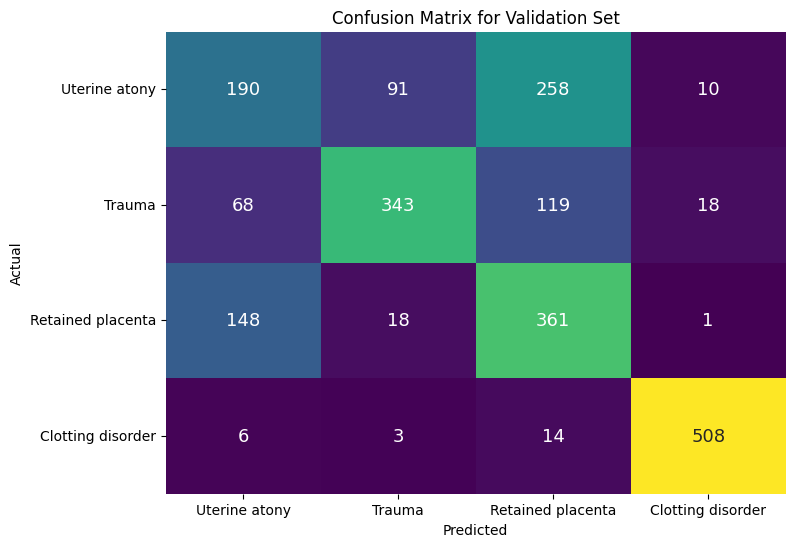

In [21]:
# Calculate the confusion matrix for the validation set
val_cm = confusion_matrix(y_val, y_val_pred)

# Calculate the confusion matrix for the test set
test_cm = confusion_matrix(y_test, y_test_pred)

# Define class names
class_names = ['Uterine atony', 'Trauma', 'Retained placenta', 'Clotting disorder']

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8, 6))
sns.heatmap(val_cm, annot=True, fmt='d', cmap="viridis", cbar=False,
            xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 13})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Validation Set')
plt.show()

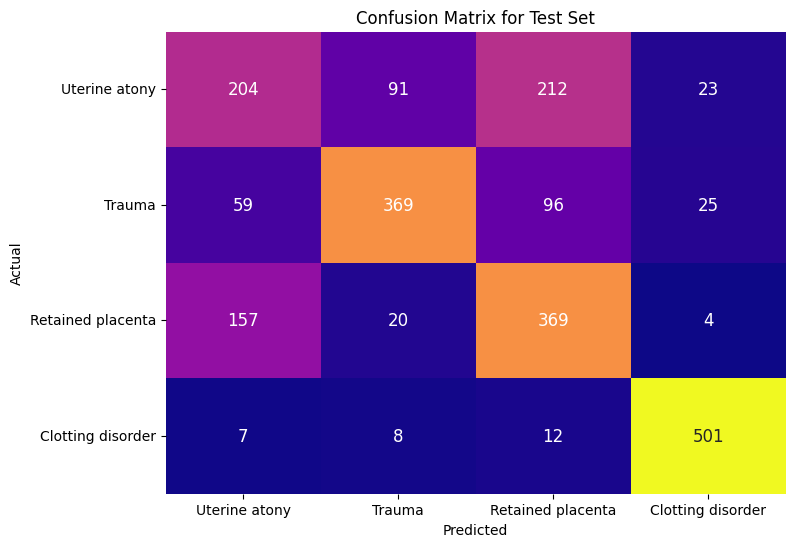

In [22]:
# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap="plasma", cbar=False,
            xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 12})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set')
plt.show()

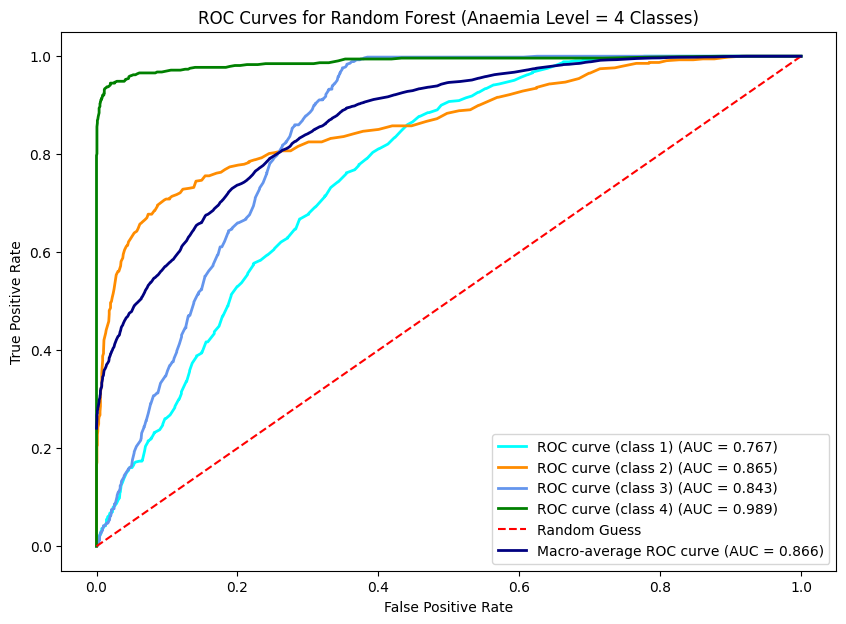

In [23]:
classes = [1, 2, 3, 4]

# Predict probabilities for each class on the validation set
y_score = rf_clf.predict_proba(X_test)

# Binarize the true labels for multi-class ROC
y_test_bin = label_binarize(y_test, classes=classes)

# Compute ROC curve and ROC area for each class
plt.figure(figsize=(10, 7))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(len(classes)), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {classes[i]}) (AUC = {roc_auc[i]:.3f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

# Calculate and plot the macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)
macro_auc = auc(all_fpr, mean_tpr)

plt.plot(all_fpr, mean_tpr, color='navy', linestyle='-', linewidth=2,
         label=f'Macro-average ROC curve (AUC = {macro_auc:.3f})')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Random Forest (Anaemia Level = 4 Classes)')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [24]:
# Train Decision Tree classifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = dt.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Validation Accuracy: {val_accuracy:.4f}')
print('Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = dt.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Test Accuracy: {test_accuracy:.4f}')
print('Test Classification Report:')
print(test_report)

Validation Accuracy: 0.5510
Validation Classification Report:
              precision    recall  f1-score   support

         1.0       0.37      0.35      0.36       549
         2.0       0.52      0.55      0.54       548
         3.0       0.46      0.46      0.46       528
         4.0       0.85      0.85      0.85       531

    accuracy                           0.55      2156
   macro avg       0.55      0.55      0.55      2156
weighted avg       0.55      0.55      0.55      2156

Test Accuracy: 0.5563
Test Classification Report:
              precision    recall  f1-score   support

         1.0       0.38      0.36      0.37       530
         2.0       0.53      0.54      0.54       549
         3.0       0.48      0.47      0.47       550
         4.0       0.82      0.86      0.84       528

    accuracy                           0.56      2157
   macro avg       0.55      0.56      0.55      2157
weighted avg       0.55      0.56      0.55      2157



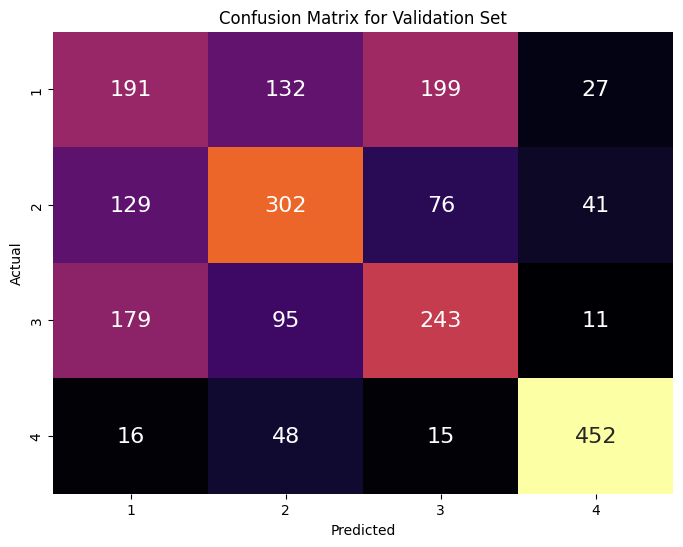

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix for the validation set
val_cm = confusion_matrix(y_val, y_val_pred)

# Calculate the confusion matrix for the test set
test_cm = confusion_matrix(y_test, y_test_pred)

# Set class names (adjust based on your actual class labels)
class_names = [str(i) for i in range(1, 5)]  # Assuming classes are 1, 2, 3, and 4

# Plot the confusion matrix for the validation set
plt.figure(figsize=(8,6))
sns.heatmap(val_cm, annot=True, fmt='d', cmap="inferno", cbar=False,
            xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Validation Set')
plt.show()

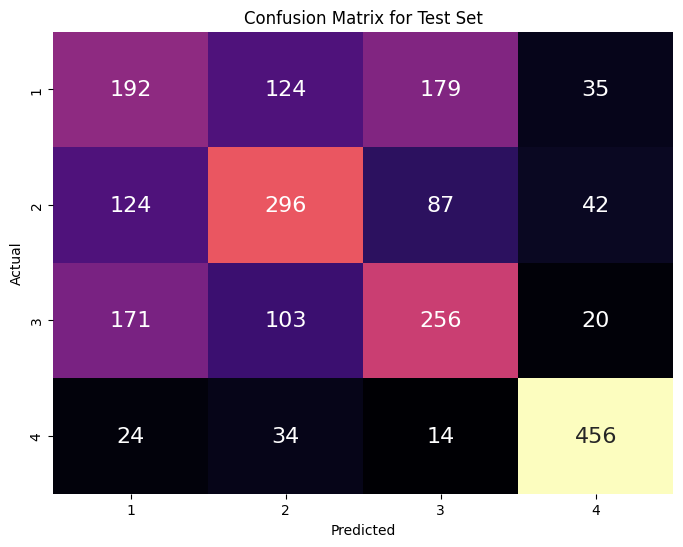

In [26]:
# Plot the confusion matrix for the test set
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap="magma", cbar=False,
            xticklabels=class_names, yticklabels=class_names, annot_kws={"size": 16})
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Test Set')
plt.show()

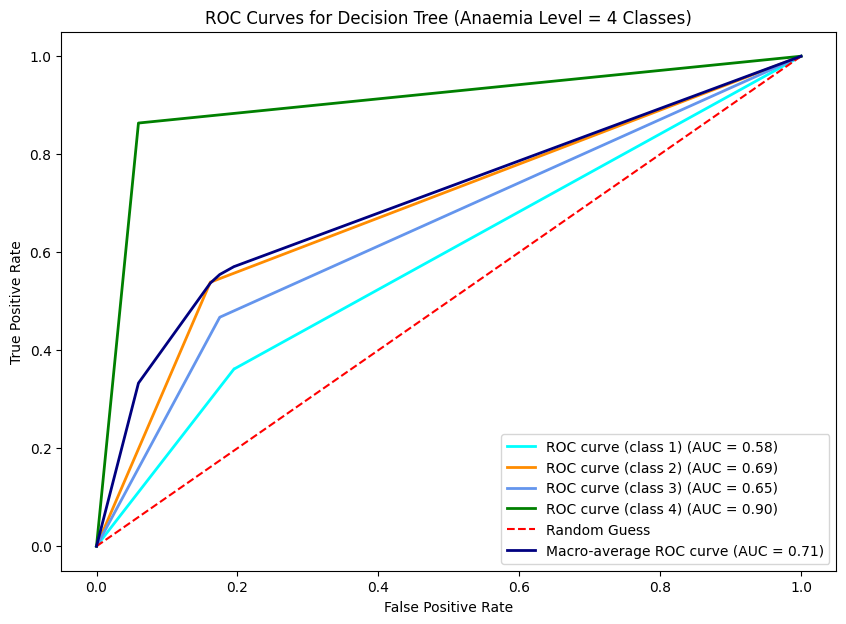

In [27]:
# Predict probabilities for each class on the test set
y_score = dt.predict_proba(X_test)

# Compute ROC curve and ROC area for each class
plt.figure(figsize=(10, 7))
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(4):  # There are 4 classes (1, 2, 3, 4)
    # Binarize the true labels for class i
    y_test_bin = label_binarize(y_test, classes=[1, 2, 3, 4])[:, i]
    # Compute ROC curve and ROC area
    fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves for each class
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'green'])
for i, color in zip(range(4), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'ROC curve (class {i+1}) (AUC = {roc_auc[i]:.2f})')

# Plot random guess line
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')

# Calculate and plot the macro-average ROC curve and AUC
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(len(classes))]))
mean_tpr = np.zeros_like(all_fpr)
for i in range(len(classes)):
    mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
mean_tpr /= len(classes)
macro_auc = auc(all_fpr, mean_tpr)

plt.plot(all_fpr, mean_tpr, color='navy', linestyle='-', linewidth=2,
         label=f'Macro-average ROC curve (AUC = {macro_auc:.2f})')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree (Anaemia Level = 4 Classes)')
plt.legend(loc='lower right')

# Show the plot
plt.show()

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Train Logistic Regression classifier
logreg = LogisticRegression(random_state=42, max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = logreg.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Logistic Regression - Validation Accuracy: {val_accuracy:.4f}')
print('Logistic Regression - Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = logreg.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Logistic Regression - Test Accuracy: {test_accuracy:.4f}')
print('Logistic Regression - Test Classification Report:')
print(test_report)

Logistic Regression - Validation Accuracy: 0.2741
Logistic Regression - Validation Classification Report:
              precision    recall  f1-score   support

         1.0       0.25      0.16      0.20       549
         2.0       0.25      0.07      0.12       548
         3.0       0.27      0.37      0.31       528
         4.0       0.29      0.50      0.37       531

    accuracy                           0.27      2156
   macro avg       0.27      0.28      0.25      2156
weighted avg       0.27      0.27      0.25      2156

Logistic Regression - Test Accuracy: 0.2777
Logistic Regression - Test Classification Report:
              precision    recall  f1-score   support

         1.0       0.27      0.17      0.21       530
         2.0       0.23      0.08      0.12       549
         3.0       0.27      0.38      0.32       550
         4.0       0.30      0.49      0.37       528

    accuracy                           0.28      2157
   macro avg       0.27      0.28      

In [29]:
from sklearn.naive_bayes import GaussianNB

# Train Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = nb.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Naive Bayes - Validation Accuracy: {val_accuracy:.4f}')
print('Naive Bayes - Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = nb.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Naive Bayes - Test Accuracy: {test_accuracy:.4f}')
print('Naive Bayes - Test Classification Report:')
print(test_report)


Naive Bayes - Validation Accuracy: 0.3135
Naive Bayes - Validation Classification Report:
              precision    recall  f1-score   support

         1.0       0.27      0.06      0.10       549
         2.0       0.28      0.27      0.27       548
         3.0       0.36      0.19      0.25       528
         4.0       0.32      0.74      0.45       531

    accuracy                           0.31      2156
   macro avg       0.31      0.32      0.27      2156
weighted avg       0.31      0.31      0.27      2156

Naive Bayes - Test Accuracy: 0.3301
Naive Bayes - Test Classification Report:
              precision    recall  f1-score   support

         1.0       0.37      0.09      0.14       530
         2.0       0.29      0.29      0.29       549
         3.0       0.43      0.20      0.27       550
         4.0       0.32      0.75      0.45       528

    accuracy                           0.33      2157
   macro avg       0.35      0.33      0.29      2157
weighted avg     

In [30]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Adjust class labels to start from 0
y_train = (y_train - 1).astype(int)
y_val = (y_val - 1).astype(int)
y_test = (y_test - 1).astype(int)

# Train XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = xgb_model.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'XGBoost - Validation Accuracy: {val_accuracy:.4f}')
print('XGBoost - Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = xgb_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'XGBoost - Test Accuracy: {test_accuracy:.4f}')
print('XGBoost - Test Classification Report:')
print(test_report)

XGBoost - Validation Accuracy: 0.6433
XGBoost - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.33      0.39       549
           1       0.76      0.59      0.67       548
           2       0.48      0.72      0.57       528
           3       0.91      0.95      0.93       531

    accuracy                           0.64      2156
   macro avg       0.65      0.65      0.64      2156
weighted avg       0.65      0.64      0.64      2156

XGBoost - Test Accuracy: 0.6523
XGBoost - Test Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.38      0.42       530
           1       0.76      0.62      0.68       549
           2       0.51      0.67      0.58       550
           3       0.90      0.95      0.92       528

    accuracy                           0.65      2157
   macro avg       0.66      0.65      0.65      2157
weighted avg       0.66      0.65

In [31]:
from sklearn.svm import SVC

# Train SVM classifier
svm = SVC(random_state=42)
svm.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = svm.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'SVM - Validation Accuracy: {val_accuracy:.4f}')
print('SVM - Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = svm.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'SVM - Test Accuracy: {test_accuracy:.4f}')
print('SVM - Test Classification Report:')
print(test_report)


SVM - Validation Accuracy: 0.2463
SVM - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.12      0.00      0.01       549
           1       0.00      0.00      0.00       548
           2       0.24      0.85      0.38       528
           3       0.27      0.15      0.19       531

    accuracy                           0.25      2156
   macro avg       0.16      0.25      0.14      2156
weighted avg       0.16      0.25      0.14      2156

SVM - Test Accuracy: 0.2527
SVM - Test Classification Report:
              precision    recall  f1-score   support

           0       0.29      0.00      0.01       530
           1       0.00      0.00      0.00       549
           2       0.25      0.84      0.39       550
           3       0.25      0.16      0.19       528

    accuracy                           0.25      2157
   macro avg       0.20      0.25      0.15      2157
weighted avg       0.20      0.25      0.15      

In [32]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest classifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = rf.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'Random Forest - Validation Accuracy: {val_accuracy:.4f}')
print('Random Forest - Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = rf.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'Random Forest - Test Accuracy: {test_accuracy:.4f}')
print('Random Forest - Test Classification Report:')
print(test_report)


Random Forest - Validation Accuracy: 0.6373
Random Forest - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.34      0.38       549
           1       0.75      0.63      0.68       548
           2       0.46      0.64      0.54       528
           3       0.94      0.95      0.94       531

    accuracy                           0.64      2156
   macro avg       0.65      0.64      0.64      2156
weighted avg       0.65      0.64      0.64      2156

Random Forest - Test Accuracy: 0.6620
Random Forest - Test Classification Report:
              precision    recall  f1-score   support

           0       0.47      0.38      0.42       530
           1       0.75      0.66      0.71       549
           2       0.52      0.65      0.58       550
           3       0.92      0.95      0.93       528

    accuracy                           0.66      2157
   macro avg       0.66      0.66      0.66      2157
weighted 

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN classifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Predict on the validation set
y_val_pred = knn.predict(X_val)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'KNN - Validation Accuracy: {val_accuracy:.4f}')
print('KNN - Validation Classification Report:')
print(val_report)

# Optionally, evaluate the model on the test set
y_test_pred = knn.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'KNN - Test Accuracy: {test_accuracy:.4f}')
print('KNN - Test Classification Report:')
print(test_report)


KNN - Validation Accuracy: 0.5737
KNN - Validation Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.48      0.48       549
           1       0.54      0.69      0.61       548
           2       0.41      0.20      0.27       528
           3       0.76      0.92      0.83       531

    accuracy                           0.57      2156
   macro avg       0.55      0.57      0.55      2156
weighted avg       0.55      0.57      0.55      2156

KNN - Test Accuracy: 0.5976
KNN - Test Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.56      0.51       530
           1       0.56      0.72      0.63       549
           2       0.49      0.20      0.29       550
           3       0.80      0.93      0.86       528

    accuracy                           0.60      2157
   macro avg       0.58      0.60      0.57      2157
weighted avg       0.58      0.60      0.57      

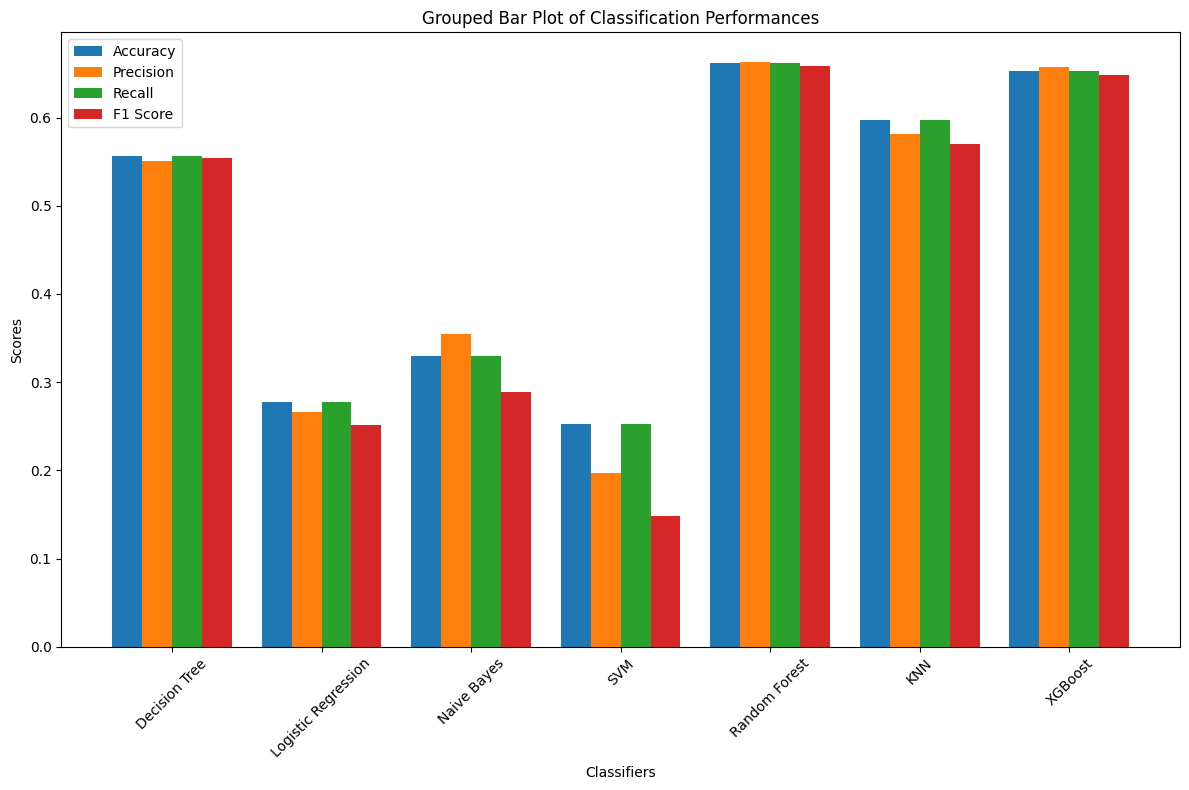

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, recall_score, f1_score

# List of models to evaluate
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Naive Bayes': GaussianNB(),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'XGBoost': xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Initialize a dictionary to store performance metrics
performance_metrics = {
    'Accuracy': [],
    'Precision': [],
    'Recall': [],
    'F1 Score': []
}

# Iterate over each model to train, predict, and collect metrics
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_test_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_test_pred)
    precision = precision_score(y_test, y_test_pred, average='weighted')
    recall = recall_score(y_test, y_test_pred, average='weighted')
    f1 = f1_score(y_test, y_test_pred, average='weighted')
    
    # Store metrics
    performance_metrics['Accuracy'].append(accuracy)
    performance_metrics['Precision'].append(precision)
    performance_metrics['Recall'].append(recall)
    performance_metrics['F1 Score'].append(f1)

# Convert to numpy array for plotting
metrics_array = np.array([performance_metrics['Accuracy'],
                          performance_metrics['Precision'],
                          performance_metrics['Recall'],
                          performance_metrics['F1 Score']])

# Create the grouped bar plot
model_names = list(models.keys())
metric_names = list(performance_metrics.keys())
n_metrics = len(metric_names)
n_models = len(model_names)

# Set up the plot
fig, ax = plt.subplots(figsize=(12, 8))

# Define bar width and positions
bar_width = 0.2
indices = np.arange(n_models)

# Plot bars for each metric
for i, metric in enumerate(metric_names):
    ax.bar(indices + i * bar_width, metrics_array[i], bar_width, label=metric)

# Add labels and title
ax.set_xlabel('Classifiers')
ax.set_ylabel('Scores')
ax.set_title('Grouped Bar Plot of Classification Performances')
ax.set_xticks(indices + bar_width * (n_metrics - 1) / 2)
ax.set_xticklabels(model_names, rotation=45)
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

In [35]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Reshape the data to fit LSTM input requirements
# Assuming X_train, X_val, X_test are 2D arrays and you want 1 time step
X_train_lstm = X_train.values.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_val_lstm = X_val.values.reshape((X_val.shape[0], 1, X_val.shape[1]))
X_test_lstm = X_test.values.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Initialize the LSTM model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(32))
model.add(Dropout(0.5))
model.add(Dense(len(np.unique(y_train)), activation='softmax'))  # Adjust output layer for number of classes

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train_lstm, y_train, epochs=20, batch_size=5, validation_data=(X_val_lstm, y_val))

# Predict on the validation set
y_val_pred_probs = model.predict(X_val_lstm)
y_val_pred = np.argmax(y_val_pred_probs, axis=1)

# Evaluate the model on the validation set
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

print(f'LSTM - Validation Accuracy: {val_accuracy:.4f}')
print('LSTM - Validation Classification Report:')
print(val_report)

# Optionally, predict on the test set
y_test_pred_probs = model.predict(X_test_lstm)
y_test_pred = np.argmax(y_test_pred_probs, axis=1)

# Evaluate the model on the test set
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f'LSTM - Test Accuracy: {test_accuracy:.4f}')
print('LSTM - Test Classification Report:')
print(test_report)

Epoch 1/20
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.2454 - loss: 1.3920 - val_accuracy: 0.2602 - val_loss: 1.3838
Epoch 2/20
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2631 - loss: 1.3860 - val_accuracy: 0.2532 - val_loss: 1.3827
Epoch 3/20
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2411 - loss: 1.3851 - val_accuracy: 0.2458 - val_loss: 1.3829
Epoch 4/20
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2533 - loss: 1.3837 - val_accuracy: 0.2468 - val_loss: 1.3828
Epoch 5/20
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.2683 - loss: 1.3803 - val_accuracy: 0.2625 - val_loss: 1.3815
Epoch 6/20
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2621 - loss: 1.3824 - val_accuracy: 0.2593 - val_loss: 1.3812
Epoch 7/20
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2627 - loss: 1.3812 - val_accuracy: 0.2472 - val_loss: 1.3816
Epoch 8/20
2013/2013 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2527 - loss: 1.3829 - 